In [33]:
# Made by: Mick Robben, Sanae Benjeddi, Nik Kashyap, and Alon Efrati 
# Group: 22

In [1]:
import pandas as pd
import json
import nltk
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import pathlib
import sklearn
import numpy
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
nlp = spacy.load('en_core_web_sm') # 'en_core_web_sm'

In [2]:
df = pd.read_csv('twitter_training.csv')
print(df.columns)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet_content']
print(df.columns)
df = df.loc[df['Sentiment'] != 'Irrelevant']

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['ID', 'Entity', 'Sentiment', 'Tweet_content'], dtype='object')


In [3]:
def important_features_per_class(vectorizer,classifier,n=10):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    topn_class3 = sorted(zip(classifier.feature_count_[2], feature_names),reverse=True)[:n]
    print("Important words in negative documents")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in neutral documents")
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat) 
    print("-----------------------------------------")
    print("Important words in positive documents")
    for coef, feat in topn_class3:
        print(class_labels[2], coef, feat) 




In [4]:
# example of how to call from notebook:
#important_features_per_class(airline_vec, clf)
df1 = df.loc[df['Tweet_content'].notnull()]
X = df1['Tweet_content']
y = df1['Sentiment']

game_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, stop_words=stopwords.words('english'))
game_counts = game_vec.fit_transform(X)

docs_train, docs_test, y_train, y_test = train_test_split(
    game_counts, # the tf-idf model
    y, # the category values for each tweet 
    test_size = 0.20 # we use 80% for training and 20% for development
    )


/Users/alonefrati/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [5]:
clf = MultinomialNB().fit(docs_train, y_train)
important_features_per_class(airline_vec,clf)
y_pred = clf.predict(docs_test)

print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

Important words in negative documents
Negative 15061.0 .
Negative 9858.0 @
Negative 7549.0 ,
Negative 5268.0 ?
Negative 4083.0 !
Negative 2994.0 game
Negative 2957.0 ’
Negative 2206.0 ...
Negative 2016.0 n't
Negative 1764.0 /
-----------------------------------------
Important words in neutral documents
Neutral 14837.0 .
Neutral 7020.0 ,
Neutral 6287.0 !
Neutral 6199.0 /
Neutral 4856.0 @
Neutral 3764.0 :
Neutral 3514.0 ...
Neutral 2549.0 ..
Neutral 2155.0 ?
Neutral 1903.0 -
-----------------------------------------
Important words in positive documents
Positive 14476.0 .
Positive 8791.0 !
Positive 6057.0 ,
Positive 4792.0 @
Positive 2271.0 ...
Positive 2010.0 ..
Positive 1941.0 /
Positive 1858.0 game
Positive 1816.0 ’
Positive 1795.0 's
              precision    recall  f1-score   support

    Negative       0.77      0.85      0.81      4467
     Neutral       0.82      0.67      0.74      3634
    Positive       0.78      0.82      0.80      4123

    accuracy                       

In [6]:
clf = RandomForestClassifier(n_estimators=50, random_state=0).fit(docs_train, y_train)
y_pred = clf.predict(docs_test)

print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

    Negative       0.94      0.93      0.94      4467
     Neutral       0.92      0.91      0.92      3634
    Positive       0.91      0.93      0.92      4123

    accuracy                           0.92     12224
   macro avg       0.92      0.92      0.92     12224
weighted avg       0.93      0.92      0.92     12224



In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=0).fit(docs_train, y_train)
y_pred = clf.predict(docs_test)

print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

    Negative       0.94      0.93      0.94      4467
     Neutral       0.93      0.91      0.92      3634
    Positive       0.91      0.94      0.92      4123

    accuracy                           0.93     12224
   macro avg       0.93      0.93      0.93     12224
weighted avg       0.93      0.93      0.93     12224



In [8]:
clf = SGDClassifier().fit(docs_train, y_train)
y_pred = clf.predict(docs_test)

print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

    Negative       0.87      0.89      0.88      4467
     Neutral       0.89      0.79      0.84      3634
    Positive       0.82      0.87      0.85      4123

    accuracy                           0.86     12224
   macro avg       0.86      0.85      0.85     12224
weighted avg       0.86      0.86      0.86     12224



In [9]:
clf = SGDClassifier('squared_loss').fit(docs_train, y_train)
y_pred = clf.predict(docs_test)

print(sklearn.metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

    Negative       0.35      0.54      0.43      4467
     Neutral       0.30      0.25      0.27      3634
    Positive       0.32      0.18      0.23      4123

    accuracy                           0.33     12224
   macro avg       0.32      0.32      0.31     12224
weighted avg       0.33      0.33      0.31     12224



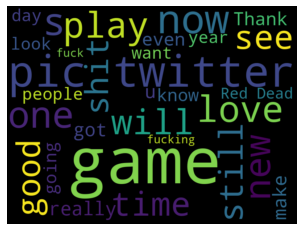

In [10]:
# Start with one review:
stopwords = set(STOPWORDS)
stopwords.update(["https", 't', 'unk'])

text = df1['Tweet_content']
wordstring = ''
for i in df1['Tweet_content']:
    wordstring = wordstring + i
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=30, width=800, height = 600, stopwords=stopwords).generate(wordstring)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
from collections import Counter 
from pprint import pprint
doc_list = []
ind = 1 
for tweet in df1['Tweet_content'][:100]:
    doc = nlp(tweet)
    print('\n', str(ind) + ': ' + tweet + '\n')
    ind += 1
    pprint([(X.text, X.label_) for X in doc.ents])





 1: I am coming to the borders and I will kill you all,

[]

 2: im getting on borderlands and i will kill you all,

[]

 3: im coming on borderlands and i will murder you all,

[]

 4: im getting on borderlands 2 and i will murder you me all,

[]

 5: im getting into borderlands and i can murder you all,

[]

 6: So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg

[('a few hours', 'TIME'), ('Maya', 'PERSON')]

 7: So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg

[('a couple of hours', 'TIME'), ('Maya', 'PERSON'

In [13]:
from simpletransformers.ner import NERModel
#sentences = ["Example sentence 1", "Example sentence 2"]
englishmodel = NERModel(
        model_type="bert",
        model_name="dslim/bert-base-NER",
        use_cuda=False
)

In [14]:
firsttweets = []
for i in df1['Tweet_content'][:100]:
    firsttweets.append(i)
    


In [17]:
predictions, raw_outputs = englishmodel.predict(firsttweets)

In [30]:
ind = 1
for i in predictions:
    print(str(ind) + ': ', i, '\n')
    ind += 1

1:  [{'I': 'O'}, {'am': 'O'}, {'coming': 'O'}, {'to': 'O'}, {'the': 'O'}, {'borders': 'O'}, {'and': 'O'}, {'I': 'O'}, {'will': 'O'}, {'kill': 'O'}, {'you': 'O'}, {'all,': 'O'}] 

2:  [{'im': 'O'}, {'getting': 'O'}, {'on': 'O'}, {'borderlands': 'O'}, {'and': 'O'}, {'i': 'O'}, {'will': 'O'}, {'kill': 'O'}, {'you': 'O'}, {'all,': 'O'}] 

3:  [{'im': 'O'}, {'coming': 'O'}, {'on': 'O'}, {'borderlands': 'O'}, {'and': 'O'}, {'i': 'O'}, {'will': 'O'}, {'murder': 'O'}, {'you': 'O'}, {'all,': 'O'}] 

4:  [{'im': 'O'}, {'getting': 'O'}, {'on': 'O'}, {'borderlands': 'O'}, {'2': 'O'}, {'and': 'O'}, {'i': 'O'}, {'will': 'O'}, {'murder': 'O'}, {'you': 'O'}, {'me': 'O'}, {'all,': 'O'}] 

5:  [{'im': 'O'}, {'getting': 'O'}, {'into': 'O'}, {'borderlands': 'O'}, {'and': 'O'}, {'i': 'O'}, {'can': 'O'}, {'murder': 'O'}, {'you': 'O'}, {'all,': 'O'}] 

6:  [{'So': 'O'}, {'I': 'O'}, {'spent': 'O'}, {'a': 'O'}, {'few': 'O'}, {'hours': 'O'}, {'making': 'O'}, {'something': 'O'}, {'for': 'O'}, {'fun.': 'O'}, {'.'

In [20]:
from collections import Counter 
print(Counter(predictions))

TypeError: unhashable type: 'list'